## DIstribution_And_Sampling

We will be working on US income data. For each county, we have the following columns:

id -- the county id.

county -- the name and state of the county.

pop_over_25 -- the number of adults over age 25.

median_income -- the median income for residents over age 25 in the county.

median_income_no_hs -- median income for residents without a high school education.

median_income_hs -- median income for high school graduates who didn't go to college.

median_income_some_college -- median income for residents who went to college but didn't graduate.

median_income_college -- median income for college graduates.

median_income_graduate_degree -- median income for those with a masters or other graduate degree.


In [92]:
# read data
import pandas as pd

income = pd.read_csv("us_income.csv")
income.head()


,id,county,pop_over_25,median_income,median_income_no_hs,median_income_hs,median_income_some_college,median_income_college,median_income_graduate_degree
0,1001,"Autauga County, Alabama",35696,34581,17946,30157,33225,53248,68125
1,1003,"Baldwin County, Alabama",130063,31352,17474,25242,30922,46017,55933
2,1005,"Barbour County, Alabama",18988,25182,20692,21325,24090,41888,50245
3,1007,"Bibb County, Alabama",15340,27638,22274,28980,22387,30284,42236
4,1009,"Blount County, Alabama",38846,32808,24870,27541,34660,48681,53664


In [93]:
# county with the lowest median income 
sort_incomes = income.sort_values("median_income",ascending=True)
lowest_income_county = sort_incomes["county"].head(1)
print(lowest_income_county)

2736    Starr County, Texas
Name: county, dtype: object


In [94]:
# county with the lowest median income and more than 50000 residents
lowest_income_high_pop_county = sort_incomes[sort_incomes.pop_over_25 > 500000]
lowest_income_high_pop_county.head()

,id,county,pop_over_25,median_income,median_income_no_hs,median_income_hs,median_income_some_college,median_income_college,median_income_graduate_degree
362,12086,"Miami-Dade County, Florida",1752160,28398,17122,21933,30735,41086,58480
195,6019,"Fresno County, California",553637,28954,15921,25136,31811,51992,67660
1830,36005,"Bronx County, New York",866898,30261,18505,25551,33432,43053,60814
367,12095,"Orange County, Florida",756005,31096,17822,23819,30475,43355,60539
106,4019,"Pima County, Arizona",650440,31630,17437,24478,31138,43332,55313


In [95]:
# using idxmin function to calculat the lowest county and highest population 

lowest_income_county = income.county[income.median_income.idxmin()]

high_population = income[income["pop_over_25"] > 500000]
lowest_income_high_population_county = high_population["county"][high_population["median_income"].idxmin()]

print(lowest_income_county," - " , lowest_income_high_population_county)


Starr County, Texas  -  Miami-Dade County, Florida


In [96]:
# generate random numbers 

import random

num = random.randint(0,10)
print(num)

random_numbers = [random.randint(0,10) for i in range(10)]
print(random_numbers)

random.seed(10)
random_numbers = [random.randint(0,10) for i in range(5)]
print(random_numbers)

random.seed(10)
random_numbers = [random.randint(0,10) for i in range(5)]
print(random_numbers)


random.seed(20)
random_numbers = [random.randint(0,10) for i in range(10)]
print(random_numbers)

random.seed(20)
random_numbers = [random.randint(0,10) for i in range(10)]
print(random_numbers)

1
[9, 10, 6, 10, 2, 8, 9, 7, 6, 3]
[9, 0, 6, 7, 9]
[9, 0, 6, 7, 9]
[10, 2, 4, 10, 10, 1, 5, 9, 2, 0]
[10, 2, 4, 10, 10, 1, 5, 9, 2, 0]


In [97]:
# selecting random sample from the list

lists = [100,200,300,400,500,600,700,800]

random.seed(1)
sample_lists = random.sample(lists,4)
print(sample_lists)


random.seed(1)
sample_lists = random.sample(lists,5)
print(sample_lists)


random.seed(1)
sample_lists = random.sample(lists,6)
print(sample_lists)

[300, 500, 100, 800]
[300, 500, 100, 800, 600]
[300, 500, 100, 800, 600, 200]


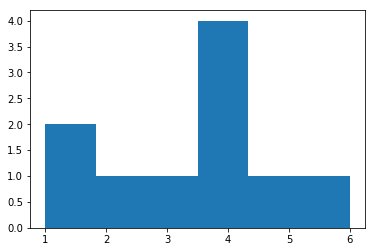

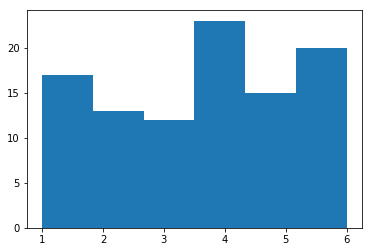

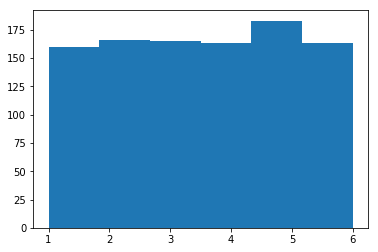

In [98]:
# compare histpgram plots for small, medium and large samples of rolling the die N times
import matplotlib.pyplot as plt
import random

def roll_dice():
    return random.randint(1,6)
    
random.seed(1)
small_sample = [roll_dice() for i in range(10)]
plt.hist(small_sample,bins=6)
plt.show()
    
    
random.seed(1)
medium_sample = [roll_dice() for i in range(100)]
plt.hist(medium_sample,bins=6)
plt.show()

random.seed(1)
large_sample = [roll_dice() for i in range(1000)]
plt.hist(large_sample,bins=6)
plt.show()



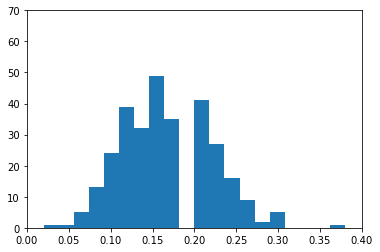

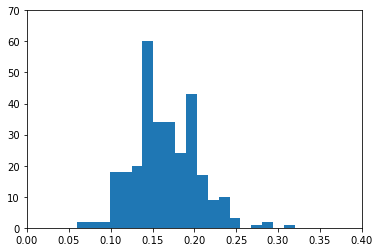

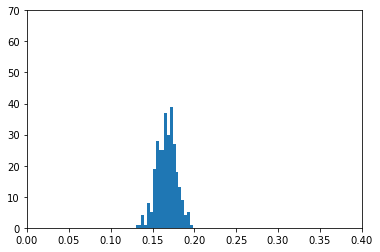

In [99]:
# probability of rolling a one from 300 trails and 10,100,1000 die rolls each

def roll():
    return random.randint(1,6)

def probability_of_one(num_trials, num_rolls):
    """
    This function will take in the number of trials, and the number of rolls per trial.
    Then it will conduct each trial, and record the probability of rolling a one.
    """
    probabilities = []
    for i in range(num_trials):
        die_rolls = [roll() for _ in range(num_rolls)]
        one_prob = len([d for d in die_rolls if d==1]) / num_rolls
        probabilities.append(one_prob)
    return probabilities

random.seed(1)
small_sample = probability_of_one(300, 50)
plt.hist(small_sample, 20)
plt.ylim(0,70)
plt.xlim(0,0.4)
plt.show()


random.seed(1)
medium_sample = probability_of_one(300, 100)
plt.hist(medium_sample, 20)
plt.ylim(0,70)
plt.xlim(0,0.4)
plt.show()

random.seed(1)
large_sample = probability_of_one(300, 1000)
plt.hist(large_sample, 20)
plt.ylim(0,70)
plt.xlim(0,0.4)
plt.show()
        
        
        
        

In [100]:
# Find how many standard deviations away from the mean of large_sample .18
# ind how many probabilities in large sample are greater than or equal to .18. 

large_sample_std = np.std(large_sample)

large_sample_mean = np.mean(large_sample)

mean_dev = (.18 - large_sample_mean) / large_sample_std
prob_gr_18 = len([i for i in large_sample if i > 0.18 ])
print(mean_dev)
print(prob_gr_18)


1.14517051164
32


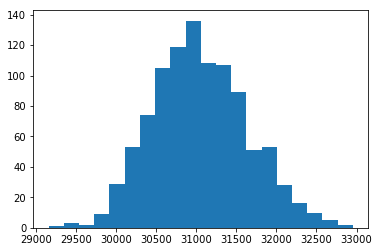

In [101]:
# pick 1000 random samples of 100 counties each from the income data and find mean and plot hsitogram


def sample_function(count):
    random_sample = random.sample(range(0,income.shape[0]),count)
    return income.iloc[random_sample]

random.seed(1)
sample_mean = [sample_function(100)["median_income"].mean() for i in range(1000)]
plt.hist(sample_mean,20)
plt.show()


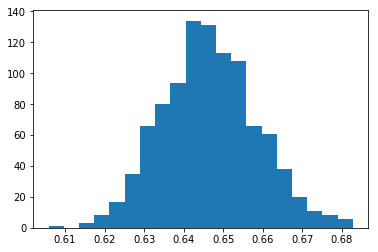

In [102]:
mean_ratios = []

random.seed(1)

for i in range(1000):
    random_sample = sample_function(100)
    sample_ratios = random_sample["median_income_hs"]/random_sample["median_income_college"] 
    mean_ratios.append(sample_ratios.mean())
    
    
plt.hist(mean_ratios,20)
plt.show()
    
